## Honor Code
"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png")

# Classification 

Agenda
1. An overview of classification
2. Dataset (heartattack_train.csv) in healthcare domain
	- data visualization, ETL (data wrangling), exploratory data analysis (correlation analysis), supervised learning (classification)
3. Decision tree
4. How to evaluate classification model
	* Confusion Matrix
	* Received Operating Characteristics & AUC score
5. Logistic regression & Logit function
6. k-Nearest Neighbour (knn)	

<img src = "images\machinelearning.gif">
<img src="images\ppt\slide2.gif">
<img src="https://nyghtowlblog.files.wordpress.com/2014/04/ml_algorithms.png?w=535&h=311">
<img src="http://scikit-learn.org/stable/_static/ml_map.png">
* http://scikit-learn.org/stable/

### Required Software
* Graphviz 

### Classification vs Regression
* Regression is about finding a liner or nonliner function, which **fits** well with the dataset
* Classification is about finding a liner or nonliner function, which **separates** different classes (e.g., good/bad, yes/no, pass/fail, admission/rejection) in y value
<img src="https://searchengineland.com/figz/wp-content/seloads/2016/07/class-regress.png">

https://searchengineland.com/figz/wp-content/seloads/2016/07/class-regress.png

# Health Analytics
- The application of data mining (machine learning & statistical testing) to different type of healthcare problems and datasets

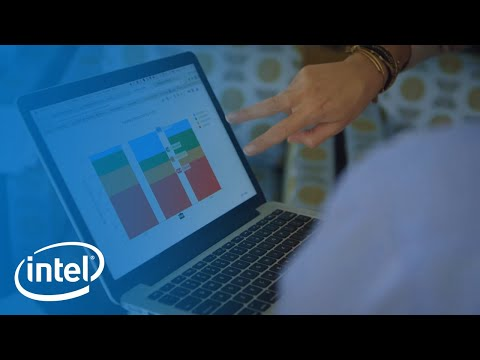

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('blQa6srwn-A')

## Can healthcare providers use data analytics to predict diseases (e.g., 2nd heart attack) and hospital readmission?

### Dataset
Source: Data Mining for the Masses by Matthew North
    
Sonia has access to the company’s medical claims database. 
With this access, she is able to generate two data sets for us. 
This first is a list of people who have suffered heart attacks, 
with an attribute indicating whether or not they have had more than one; 
and the second is a list of those who have had a first heart attack, but not a second. 
The former data set, comprised of 138 observations, will serve as our training data; while the latter, 
comprised of 690 peoples’ data, will be for scoring. 
Sonia’s hope is to help this latter group of people avoid becoming second heart attack victims. 

In compiling the two data sets we have defined the following attributes: 

* **Age**: The age in years of the person, rounded to the nearest whole year. 
* **Marital_Status**: The person’s current marital status, indicated by a coded number: **0–Single, never married; 1–Married; 2–Divorced; 3–Widowed** 
* **Gender**: The person’s gender: **0 for female; 1 for male**. 
* **Weight_Category**: The person’s weight categorized into one of three levels: **0 for normal weight range; 1 for overweight; and 2 for obese** 
* **Cholesterol**: The person’s cholesterol level, as recorded at the time of their treatment for their most recent heart attack (their only heart attack, in the case of those individuals in the scoring data set. 
* **Stress_Management**: A binary attribute indicating whether or not the person has previously attended a stress management course: **0 for no; 1 for yes**. 
* **Trait_Anxiety**: A score on a scale of **0 to 100** measuring the level of each person’s natural stress levels and abilities to cope with stress. A short time after each person in each of the two data sets had recovered from their first heart attack, they were administered a standard test of natural anxiety. Their scores are tabulated and recorded in this attribute along five point increments. A score of 0 would indicate that the person never feels anxiety, pressure or stress in any situation, while a score of 100 would indicate that the person lives in a constant state of being overwhelmed and unable to deal with his or her circumstances. 
* **2nd_Heart_Attack**: This attribute exists only in the training data set. It will be our label, the prediction or target attribute. In the training data set, the attribute is set to **‘yes’** for individuals who have suffered second heart attacks, and **‘no’** for those who have not.                  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/Users/jordanmartin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Loading data

In [4]:
# Question 1: Load data and check missing data
df = pd.read_csv('heartattack_train.csv')

In [5]:
for index, row in df.iterrows():
    if row['Age'] is None or row['Age'] < 1 \
    or row['Marital_Status'] is None or row['Marital_Status'] < 0 or row['Marital_Status'] > 3 \
    or row['Gender'] is None or row['Gender'] < 0 or row['Gender'] > 1 \
    or row['Weight_Category'] is None or row['Weight_Category'] < 0 or row['Weight_Category'] > 2 \
    or row['Cholesterol'] is None or row['Cholesterol'] < 0 \
    or row['Stress_Management'] is None or row['Stress_Management'] < 0 or row['Stress_Management'] > 1 \
    or row['Trait_Anxiety'] is None or row['Trait_Anxiety'] < 0 or row['Trait_Anxiety'] > 100 \
    or row['2nd_Heart_Attack'] not in ['Yes','No']:
        print('Row ' + index + ' is missing data. The row is printed below:')
        print(row)
# There was no missing data as this shows

# Data wrangling & ETL: Data cleaning & transformation

In [6]:
# Question 2: In 2nd_Heart_Attack column, replace "No" with 0; replace "Yes" with 1
df = df.replace({'2nd_Heart_Attack': 'No'}, {'2nd_Heart_Attack': '0'})
df = df.replace({'2nd_Heart_Attack': 'Yes'}, {'2nd_Heart_Attack': '1'})

In [7]:
# Question 3: convert 2nd_Heart_Attack from object to number
df['2nd_Heart_Attack'] = df['2nd_Heart_Attack'].astype(int)

# Exploratory data analysis

In [8]:
# Question 4: basic statistics
df.describe()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,62.978261,1.695652,0.623188,0.920290,177.391304,0.442029,55.434783,0.492754
std,7.853092,0.824875,0.486352,0.764749,32.262707,0.498437,12.373126,0.501769
min,42.000000,0.000000,0.000000,0.000000,122.000000,0.000000,35.000000,0.000000
25%,58.000000,1.000000,0.000000,0.000000,161.000000,0.000000,45.000000,0.000000
50%,63.000000,2.000000,1.000000,1.000000,172.000000,0.000000,55.000000,0.000000
75%,69.000000,2.000000,1.000000,1.750000,188.750000,1.000000,60.000000,1.000000
max,81.000000,3.000000,1.000000,2.000000,239.000000,1.000000,80.000000,1.000000


Column 0:
    Age  0
0    42  1
1    48  1
2    49  2
3    50  3
4    51  4
5    52  8
6    53  2
7    54  6
8    55  2
9    57  1
10   58  9
11   59  7
12   60  7
13   61  7
14   62  3
15   63  7
16   64  9
17   65  4
18   66  9
19   67  4
20   68  3
21   69  5
22   70  6
23   71  6
24   72  7
25   73  5
26   74  2
27   75  4
28   76  1
29   80  2
30   81  1


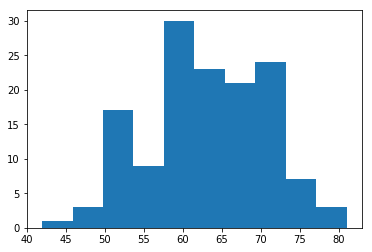

Column 1:
   Marital_Status   0
0               0   8
1               1  50
2               2  56
3               3  24


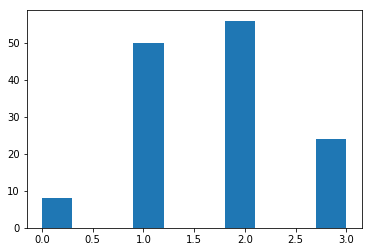

Column 2:
   Gender   0
0       0  52
1       1  86


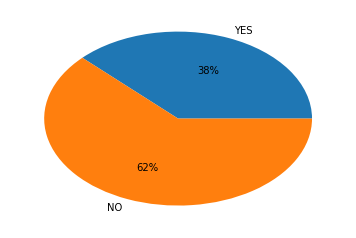

Column 3:
   Weight_Category   0
0                0  46
1                1  57
2                2  35


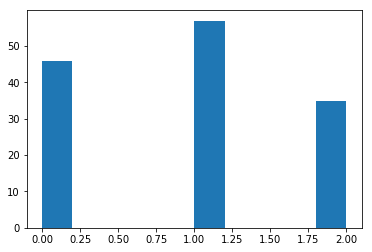

Column 4:
    Cholesterol   0
0           122   2
1           123   1
2           124   1
3           125   3
4           126   1
5           137   3
6           138   2
7           139   5
8           140   2
9           141   3
10          143   1
11          146   3
12          147   1
13          148   3
14          150   1
15          159   1
16          160   1
17          161   4
18          162   2
19          165   3
20          167   1
21          168   1
22          169   8
23          170   4
24          171   2
25          172  14
26          173   6
27          174   7
28          175   2
29          177   1
30          178   5
31          179   1
32          180   1
33          181   1
34          182   1
35          185   1
36          186   2
37          187   1
38          188   1
39          189   1
40          199   1
41          200   1
42          202   1
43          203   3
44          220   5
45          221   1
46          222   2
47          223   1
48        

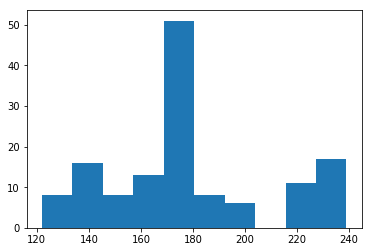

Column 5:
   Stress_Management   0
0                  0  77
1                  1  61


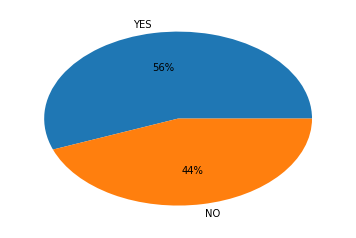

Column 6:
   Trait_Anxiety   0
0             35   8
1             40  16
2             45  16
3             50  24
4             55   8
5             60  32
6             65  12
7             70   6
8             75   6
9             80  10


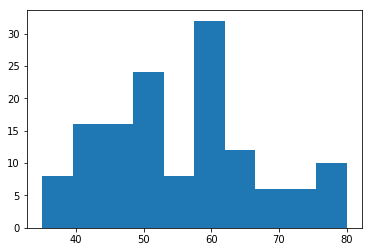

Column 7:
   2nd_Heart_Attack   0
0                 0  70
1                 1  68


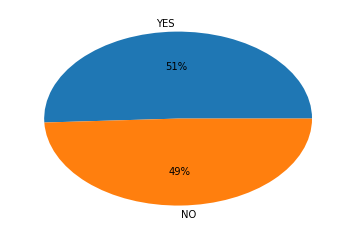

In [9]:
# This provides some charts for each column that describe the data
i = 0
for column in list(df):
    print("Column " + str(i) + ":")
    # Get the statistic for the column
    statistic = df.groupby(column).size().reset_index()
    # Print the raw data how many people have each value in the column
    print(statistic)
    # If the statistic is binary, show pie charts
    if len(statistic.index) == 2:
        plt.pie(statistic[0], labels=["YES", "NO"], autopct='%1.0f%%')
        plt.show()
    # Otherwise, show bar charts for each
    else: plt.hist(df[column], label= column)
    plt.show()
    i = i + 1

In [10]:
# Question 5: show correlation of your data
df.corr()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
Age,1.000000,0.427159,0.076195,0.402007,0.395331,-0.359295,0.667169,0.499182
Marital_Status,0.427159,1.000000,-0.033225,0.065402,0.273574,-0.291773,0.238340,0.364978
Gender,0.076195,-0.033225,1.000000,0.448531,0.191354,-0.241320,0.082007,0.317746
Weight_Category,0.402007,0.065402,0.448531,1.000000,0.397702,-0.347322,0.501244,0.730832
Cholesterol,0.395331,0.273574,0.191354,0.397702,1.000000,-0.405735,0.579485,0.506531
Stress_Management,-0.359295,-0.291773,-0.241320,-0.347322,-0.405735,1.000000,-0.321362,-0.439473
Trait_Anxiety,0.667169,0.238340,0.082007,0.501244,0.579485,-0.321362,1.000000,0.482548
2nd_Heart_Attack,0.499182,0.364978,0.317746,0.730832,0.506531,-0.439473,0.482548,1.000000


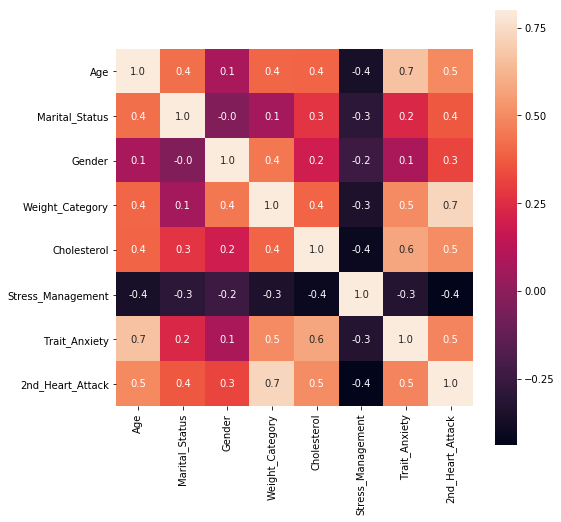

In [11]:
# Question 6: heatmap for correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

# Data visualization & business intelligence
I skip this step to focus on model building. In a real-world project, you should extract business intelligence using data visualization (e.g., groupby, matplotlib, seaborn)


# Model Building (Predictive/Classification analytics)

## Top 10 algorithms & methods used by Data Scientists.

<img src="images/top10algorithms.png">
source: kdnuggets.com

There are many different machine learning algorithms for predictive model building. 

> - **Decision Tree**
> - **Logistic Regression**
> - **k-nearest neighbors**

## Decision Tree

* Most intuitive
* Implicitly perform feature selection (selecting which X variables are important)
* Requires little effort from users for data preparation (can handle missing values)
* Easy to interpret and explain to executives!
* Provides decision rules
* Different decision tree classification algorithms (e.g., CART, ID3, CHAID)
* CART (Classification And Regression Tree) is the default (in scikit learn)

Let's consider an example:
<img src="images\dt1.gif">

<center> 4 people with good credit & 5 people with bad credit status </center>

Here is the decision tree
<img src="images\dt2.gif">

The goal of decision tree is to split a node in a way to maximize purity. The above example tells that each splited node is 100% pure, which is ideal. See the appendix more about "impurity" or Gini index.

Let's consider another example:
<img src="images\dt3.gif">

<center> 22 people with passing grade & 20 people with failing grade </center>


How about this split?
<img src="images\dt4.gif">

Here is the decision tree: Each box is called **"a leaf node"**
<img src="images\dt5.gif">

Then, **decision rules** are:
> * If Enlish score >= 80 then, "pass"
> * Elseif Math score >= 75 then, "pass"
> * Else, then "fail"

> The above decision tree indicates that **English Score** is the most important X variable to consider in terms of determining who is likely to pass or fail.

# Model Building & Validation

When building a predictive model, we split the original data into two datasets: **training dataset and testing (validation) dataset**. This is called **"split validation"**, a type of **"model validation"**
- A predictive model is built using the **training dataset** and **the model quality** is assessed as the model is applied into the **testing (validation) dataset** (See Appendix for more details)

> **Two types of model validation**: 
 1. **split validation** (70% of the original data as training and the other 30% as testing dataset)
 2. **cross validation** (90% of the original data as training and the other 10% as testing dataset): This allows to test the model quality 10 times. The average value is used to measure the model performance

In [12]:
# Question 7: declare X variables and y variable
y = df['2nd_Heart_Attack']
X = df.drop(['2nd_Heart_Attack'], axis=1)

In [13]:
# Question 8: split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Hint: Initialize DecisionTreeClassifier()
dt = tree.DecisionTreeClassifier()

In [14]:
# Question 9: Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# Question 10: Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))
# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.9285714285714286
--------------------------------------------------------
[[18  1]
 [ 2 21]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.90      0.95      0.92        19
          1       0.95      0.91      0.93        23

avg / total       0.93      0.93      0.93        42

--------------------------------------------------------
0.9302059496567506


> **So, what is the model accuracy?**

The decision tree model is 92.9% accurate. Therefore, we expect that the model will be about **93% accurate** when the model is applied into a real-world situation

True Positive Rate (Sensitivity) = 21/23 = 0.95

False Positive Rate = 1/19 = 0.052

True Negative Rate (Specificity) = 18/19

False Negatve Rate = 2/23

There is another important measure (perhaps, the most popular one) called **AUC** (see the appendix for more details)

<img src="images\ppt\slide17.gif">
<img src="images\ppt\slide18.gif">

http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Precision = true positives / (true positives + false positives) 
    - The ability of the classifier to not label a negative sample as positive

Recall = true positives / (true positives + false negatives). 
    - The ability of the classifier to find all positive samples

f1  = (precision $*$ recall) / (precision + recall)

confusion matrix: rows are the actual values; columns are the predicted value

AUC score (Area Under Curve, see the appendix for more details)

## Interpreting decision tree

Weight_category appears to be the single most influential factor

Many decision rules can be extracted. For example:

1. if weight_category < 0.5 (meaning normal), 31 people (who in normal weight category) do not have 2nd heart attack.
2. if weight_category > 0.5 (meaning overweight or obese) and Marital_status < 1.5 (meaning single or married) and Trait_Anxiety < 62.5 (meaning low anxiety level), people tend NOT to have 2nd heart attack. 17 people are in this category.
3. develop more decision rules here ...

# Appendixes 

## 1: 10 fold cross validation

We have used split validataion (training set and testing set) to build predictive models and test their quality. There is another option called 10 folder cross validation.

### Split validation
* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
* 70% of the data for “training” (or building) a supervised learning model and 30% of the data for “testing” the quality of the model

* Let's consider an exmple
    * X value = Size ; y value = Price 
<img src="http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20[1].png">

<img src="http://www.developer.com/imagesvr_ce/6793/ML4.png">

### Cross validation (CV) or 10-fold CV
* The basic idea is that, rather than testing the model quality **only once**, cross validation (or 10-fold CV) tests the model **10 times** with 10 different testing datasets.
#### How?
* The training (or original) dataset is randomly partitioned into 10 equal sized subsamples (see the figure below). 
* At each time, one subsample is set aside as the **testing** or **validation dataset** and the other 9 subsamples are used as the training dataset. 
* A model is built using the training dataset and tested with the testing dataset. This is done 10 times. 
* This leads to 10 evaluation scores (mean squared error). The final score is based on the average of the scores.

<img src="https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png">

## Appendix 2. Model building, evaluation and model selection/deployment in machine learning

In [16]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part1/testing.png")

## Appendix 3: Random Forest (Ensemble model): Very Important !!!
- This is like **getting opionions from multiple doctors**, not one doctor, for medical diagnosis
- Building **multiple decision trees (ensembled decision trees) with the purpose to improve the model accuracy**
- **RandomForestClassifier**(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
    - n_estimators = the number of **decision trees** in the forest 
- **Combining different opionions is likely to lead to high accuracy**. 
- The winners of some recent industry data anlytics competitions (e.g., Kaggle.com) happened to use **random forest**. A recent paper "[(Do We Need Hundreds of Classifiers to Solve Real World Classification Problems?)](http://jmlr.csail.mit.edu/papers/volume15/delgado14a/delgado14a.pdf)" published in the Journal of Machine Learning Research shows:

> **Ensembled decision tree (Random Forest) performs the best for most classification problems.**

- "blackbox" algorithm: a drawback ...

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9523809523809523

In [18]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9523809523809523
[[18  1]
 [ 1 22]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        19
          1       0.96      0.96      0.96        23

avg / total       0.95      0.95      0.95        42



> #### Feature Selection (or Feature Engineering)

In [19]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in clf.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0157, 'Gender'), (0.0249, 'Stress_Management'), (0.1048, 'Age'), (0.1182, 'Trait_Anxiety'), (0.2365, 'Weight_Category'), (0.2394, 'Marital_Status'), (0.2605, 'Cholesterol')]


Weight_Category appears to be an important predictor

In [20]:
# another method
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False)

,feature,importance
4,Cholesterol,0.260476
1,Marital_Status,0.239367
3,Weight_Category,0.236544
6,Trait_Anxiety,0.118225
0,Age,0.104784
5,Stress_Management,0.024881
2,Gender,0.015723


In [21]:
#Predict class probabilities for X
clf.predict_proba(X_test)
# 1st value: the probability of NO
# 2nd value: the probability of YES (2nd heart attack)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.35, 0.65],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.05, 0.95],
       [0.2 , 0.8 ],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.15, 0.85],
       [1.  , 0.  ],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.1 , 0.9 ],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.85, 0.15]])

### Make predictions on the new dataset (scoring dataset without y value)

In [22]:
score=pd.read_csv("heartattack_scoring.csv")
output_scoring = clf.predict(score)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted 2nd Heart Attack'])

probs = clf.predict_proba(score)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])

risky_patients = predicted_y.join(probs)

risky_patients.to_csv("output_heartattack_RandomForest_ScoringDataset.csv")

##  Appendix 4: Model Evaluation with Receiver Operating Characteristic (ROC)
* In addition to confusion matrix, this is another method to evaluate classifier output quality
* True positive rate on the Y axis and false positive rate on the X axis (the top left corner of the plot is “ideal point”)
* The steeper the curve is, the better the classifier quality is
* In general, high quality model leads to a steeper curve

# ROC & AUC Score

- TPR on the Y axis
- FPR on the X axis
- High TPR --> High model accuracy
- High FPR --> Poor model accuracy
- Therefore, a steeper curve indicates a good model performance

# Examples
<img src = "http://gim.unmc.edu/dxtests/roccomp.jpg">

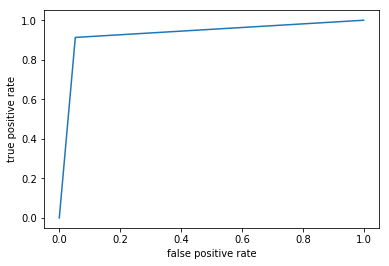

False-positive rate: [0.         0.05263158 1.        ]
True-positive rate:  [0.         0.91304348 1.        ]
AUC score:  0.9302059496567506


In [23]:
y = df['2nd_Heart_Attack']
X = df.drop(['2nd_Heart_Attack'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,dt.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print("False-positive rate:", fpr)
print("True-positive rate: ", tpr)
print("AUC score: ", metrics.roc_auc_score(y_test, dt.predict(X_test)))

- **Yes. ROC chart shows that 5% FPR & 91.3% TPR**
- **And, AUC is 0.93**

### AUC (Area Under Curve), perhaps the most widely used measure, is considered more important than accuracy (confusion matrix)

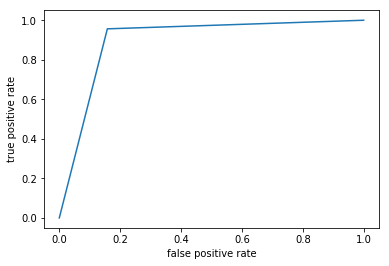

False-positive rate: [0.         0.15789474 1.        ]
True-positive rate:  [0.         0.95652174 1.        ]
AUC score:  0.8993135011441648


In [24]:
# Generate ROC chart using your second (simple) decision tree model

y = df['2nd_Heart_Attack']
X = df.drop(['2nd_Heart_Attack'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,dt_simple.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print("False-positive rate:", fpr)
print("True-positive rate: ", tpr)
print("AUC score: ", metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))

## Appendix 5: Decision Tree Algorithm

CART (Calssification And Regression Tree) is the default decision tree classication algorithm in scikit learn. 

The goal of this algorithm is **to minimize impurity in nodes** (in other words, to maximize purity in nodes).

<img src="images\gini.png">

where Gini score is the degree of **impurity**

Consider an example below:
<img src="images\dt1.gif">

9 observations in the dataset. 
- **_Before split_,** 
    - ** the box contains 5 poor creditors and 4 good creditors.**
    - **Gini impurity = 1 - (5/9)^2 - (4/9)^2  = 0.5 (this is the maxium impurity)**


The best way to minimize impurity is below:
<img src="images\dt2.gif">

- **_After split_,** 
    - the left node contains 5 poor creditors and 0 good creditors: **Gini impurity of the left node = 1 - (5/5)^2 - (0/5)^2  = 0 (this is the minimum impurity)**
    - the right node contains 0 poor creditors and 4 good creditors: **Gini impurity of the right node = 1 - (0/4)^2 - (4/4)^2  = 0 (this is the minimum impurity)**
    - **The weighted Gini = (5/9)*0 + (4/9)*0 = 0**
    - This is an example of perfect classification :)

#### Let's consider another example:
<img src="images\dt3.gif">

42 observations in the dataset: 22 people with passing grade & 20 people with failing grade  
- **_Before split_,** 
    - the large retangle contains 5 poor creditors and 4 good creditors.**
    - **Gini impurity = 1 - (20/42)^2 - (22/42)^2  = 0.5 (this is the maxium impurity)**

#### How about this split?
<img src="images\dt4.gif">

- **_After 1st split_,** 
    - the left retangle contains 19 fails and 3 pass: **Gini impurity of the left node = 1 - (19/22)^2 - (3/22)^2  = 0.23**
    - the right retangle contains 1 fail and 19 passes: **Gini impurity of the right node = 1 - (1/20)^2 - (19/20)^2  = 0.095**
    - **The weighted Gini = (22/42)*0.23 + (20/42)*0.095 = 0.165**

- **_After 2nd split_,** 
    - the top left retangle contains 1 fail and 3 pass: **Gini impurity of the left node = 1 - (1/4)^2 - (3/4)^2  = 0.375**
    - the bottom left retangle contains 18 fails and 0 pass: **Gini impurity of the left node = 1 - (18/18)^2 - (0/18)^2  = 0**
    - the right retangle contains 1 fail and 19 passes: **Gini impurity of the right node = 1 - (1/20)^2 - (19/20)^2  = 0.095**
    - **The weighted Gini = (4/42)*0.375 + (18/42)*0 + (20/42)*0.095 = 0.080**